In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [51]:
df= pd.read_csv("ResumeDS.csv")

UNDERSTANDING DATA

In [7]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
df.shape

(962, 2)

In [11]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

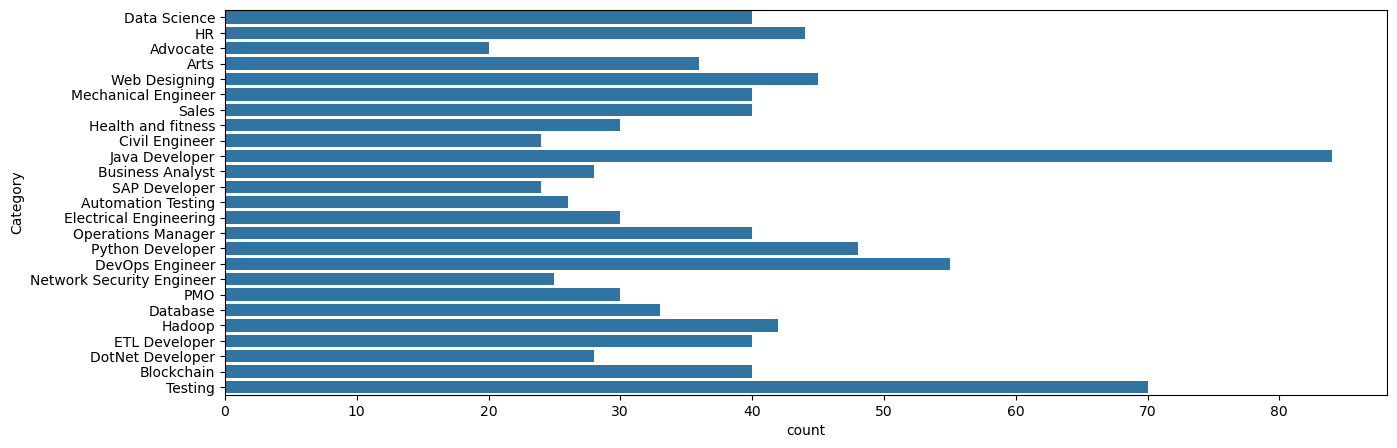

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])


In [27]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [23]:
df['Category'].nunique()

25

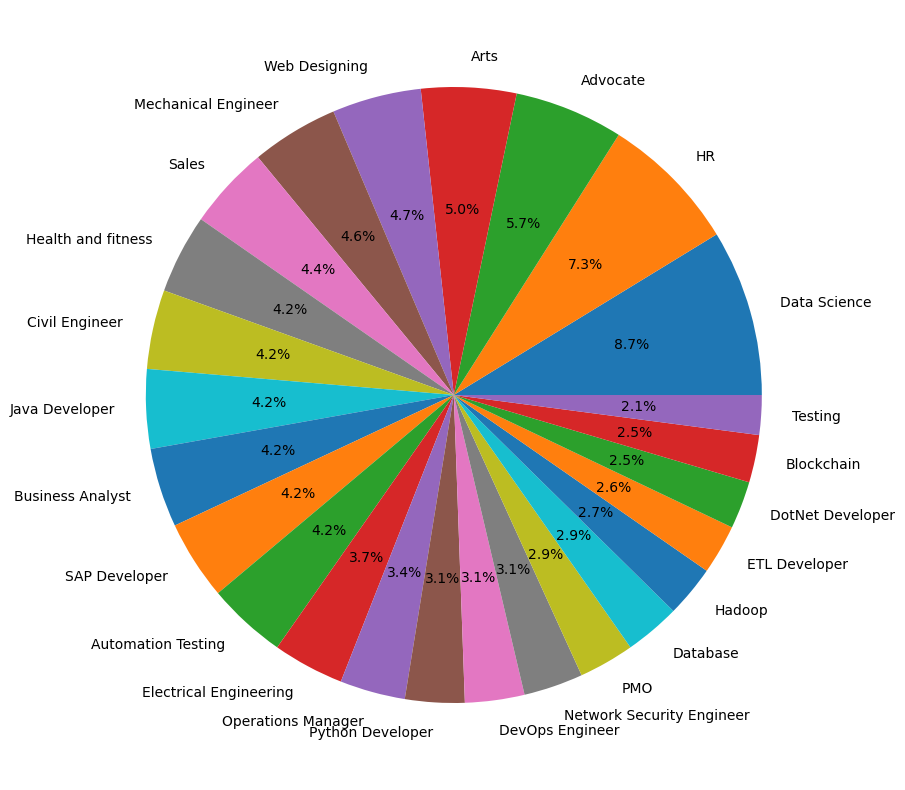

In [41]:
counts= df['Category'].value_counts()
labels=df['Category'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

EXPLORING RESUME

In [48]:
df['Category'][0]

'Data Science'

In [46]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

REGEX FUNCTION

In [88]:
def regex(txt):
    cleanTxt=re.sub(r'http\S+',' ',txt)
    cleanTxt=re.sub(r'RT|CC',' ',cleanTxt)
    cleanTxt=re.sub(r'@\S+',' ',cleanTxt)
    cleanTxt=re.sub(r'#\S+',' ',cleanTxt)
    cleanTxt = re.sub(r'[%s]' % re.escape(r"!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"), ' ', cleanTxt)
    cleanTxt=re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt=re.sub(r'\s',' ',cleanTxt)


    return cleanTxt

In [82]:
regex('My website is http//sadujadwnanio@gadwalmwda.com and access it #asdbahjwdbawhd awdawa adwab!@#$')

'My website is   and access it   awdawa adwab  '

In [90]:
df['Resume']=df['Resume'].apply(lambda x: regex(x))

In [94]:
df['Resume'][0]

'Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na  ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details     Data Science Assurance Associate     Data Science Assurance Associate   Ernst   Young LLP  Skill Details   JAVASCRIPT  Exprience   24 months  jQuery  Exprience   24 months  Python  Exprience   24 monthsCompany Details   company   Ernst   Young LLP  description   Fraud Investigations and Dispute Servi

USING LABEL ENCODER TO GIVE SPECIFIC NUMBERS TO EACH CATEGORY

In [99]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [101]:
le.fit(df['Category'])
df['Num category']=le.transform(df['Category'])

In [105]:
df.head()

,Category,Resume,Num category
0,Data Science,Skills Programming Languages Python pandas...,6
1,Data Science,Education Details May 2013 to May 2017 B E ...,6
2,Data Science,Areas of Interest Deep Learning Control Syste...,6
3,Data Science,Skills R Python SAP HANA Table...,6
4,Data Science,Education Details MCA YMCAUST Faridabad...,6


VECTORIZATION

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredText=tfidf.transform(df['Resume'])


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText,df['Num category'], test_size=0.2, random_state=42)

In [126]:
X_train.shape

(769, 7339)

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf= OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
prediction_val= accuracy_score(y_test,y_pred)
print(prediction_val*100)

98.44559585492227


CREATING PICKLE FILES

In [145]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [147]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [ ]:

def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    regex = regex(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]  # Return the category name